# Sinusoidal amplitude, frequency and phase estimation

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))
from pyestimate import sin_param_estimate

import numpy as np
import matplotlib.pyplot as plt

## Define a sinusoidal signal, corrupted by white gaussian noise
We want to pyestimate the amplitude $A$, frequency $f$ and phase $\phi$ of a sinusoidal signal corrupted by white gaussian noise $w$: <br/>
$x[n] = A \cos(2 \pi f n + \phi) + w[n]$ for $n=0, 1, ..., N-1$ <br/>
$A > 0$, $\phi \in [-\pi, \pi]$ and $f$ is the digital frequency, computed as the ratio of analog frequency to sampling frequency: $0 < f = \frac{F}{F_s} < 0.5$

In [2]:
N = 20 # number of samples
f = 0.123456 # frequency to be estimated
A = 1.23456 # amplitude to be estimated
phi = np.pi/7 # phase to be estimated
sigma = 1 # standard deviation of WGN

n = np.arange(N)
s = A * np.cos(2*np.pi*f*n+phi) # original signal
w = np.random.default_rng(seed=0).normal(scale=sigma, size=N) # white gaussian noise
x = s+w # input signal for estimation: sine + noise

## pyestimate sinusoidal parameters and plot estimation
The plot compares the original signal to the estimated signal. The estimated signal is obtained from the corrupted signal.

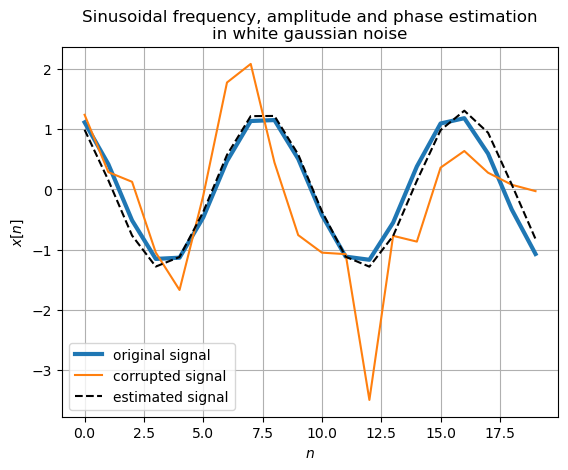

In [3]:
A_hat, f_hat, phi_hat = sin_param_estimate(x) # parameters estimation
s_hat = A_hat * np.cos(2*np.pi*f_hat*n+phi_hat) # estimated signal

plt.plot(n, s, linewidth=3.0, label='original signal')
plt.plot(n, x, label='corrupted signal')
plt.plot(n, s_hat, 'k--', label='estimated signal')

plt.xlabel('$n$')
plt.ylabel('$x[n]$')
plt.title('Sinusoidal frequency, amplitude and phase estimation\nin white gaussian noise')
plt.legend()
plt.grid()
plt.show()